# NatDev - EC Modeling

#### Importing Libraries

In [150]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_predict

## Load Data

In [151]:
# Load data
data_file_path = 'C:/Users/pranshuk/OneDrive - Logic20 20 Inc/Desktop/EC Prediction Data/New EC Data/data_w_geo_predictors_proj_level_kc.xlsx'
data = pd.read_excel(data_file_path)

In [152]:
#load data
data_file_path_2 = 'C:/Users/pranshuk/OneDrive - Logic20 20 Inc/Desktop/EC_Data_May_5/data_w_geo_predictors_proj_level.xlsx'
data2 = pd.read_excel(data_file_path)

In [153]:
#display rows
data.head()

,proj_cd,por_id,site_region_name,site_mkt_name,site_cty_name,site_county_name,site_addr_desc,site_type_desc,site_class_desc,Siterra_And_elemenT_Structure_Owner,...,awater,intptlat,intptlon,Universe_geometry_k,SITETYPE,LEVY_JURIS,PROPTYPE,KCA_ZONING,PREUSE_COD,PREUSE_DES
0,SE04035A - Site Modification (4902665),"POR0348914,POR0256248",WEST,SEATTLE WA,Renton,King,3401 Lind Avenue SW,Structure Non Building,Monopole,Crown Castle T3,...,4544405.0,47.479191,-122.194613,73e4ab58f0aed3fd,C9,RENTON,C,IL,195.0,Warehouse
1,SE01130C - Site Modification (4902594),POR0256260,WEST,SEATTLE WA,Seattle,King,9725 3rd Avenue NE,Building,Roof Top Mount,"US Wireless, Inc.",...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,C1,SEATTLE,C,SM-NG 145,106.0,Office Building
2,SE02108E - Site Modification (4946325),"POR0307721,POR0254995,POR0327285",WEST,SEATTLE WA,Seattle,King,3206 SW Admiral Way,Structure Non Building,Wood Pole,City of Seattle,...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,NaN,NaN,NaN,NaN,NaN,NaN
3,SE03559F - Site Modification (4902649),"POR0260721,POR0308045",WEST,SEATTLE WA,Tukwila,King,4030 S. 140th St,Structure Non Building,Wood Pole,City of Seattle,...,1069363.0,47.476289,-122.275740,9b2abbc615945874,R2,TUKWILA,C,HDR,11.0,Apartment
4,SE02339D - Site Modification (4902627),POR0256254,WEST,SEATTLE WA,Redmond,King,18609 NE 65th Street,Structure Non Building,Watertank,City of Redmond,...,1732419.0,47.677925,-122.115336,43129f32c57993d3,U1,REDMOND,C,MP,266.0,"Utility, Public"


In [154]:
#displaying rows
data2.head()

,proj_cd,por_id,site_region_name,site_mkt_name,site_cty_name,site_county_name,site_addr_desc,site_type_desc,site_class_desc,Siterra_And_elemenT_Structure_Owner,...,awater,intptlat,intptlon,Universe_geometry_k,SITETYPE,LEVY_JURIS,PROPTYPE,KCA_ZONING,PREUSE_COD,PREUSE_DES
0,SE04035A - Site Modification (4902665),"POR0348914,POR0256248",WEST,SEATTLE WA,Renton,King,3401 Lind Avenue SW,Structure Non Building,Monopole,Crown Castle T3,...,4544405.0,47.479191,-122.194613,73e4ab58f0aed3fd,C9,RENTON,C,IL,195.0,Warehouse
1,SE01130C - Site Modification (4902594),POR0256260,WEST,SEATTLE WA,Seattle,King,9725 3rd Avenue NE,Building,Roof Top Mount,"US Wireless, Inc.",...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,C1,SEATTLE,C,SM-NG 145,106.0,Office Building
2,SE02108E - Site Modification (4946325),"POR0307721,POR0254995,POR0327285",WEST,SEATTLE WA,Seattle,King,3206 SW Admiral Way,Structure Non Building,Wood Pole,City of Seattle,...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,NaN,NaN,NaN,NaN,NaN,NaN
3,SE03559F - Site Modification (4902649),"POR0260721,POR0308045",WEST,SEATTLE WA,Tukwila,King,4030 S. 140th St,Structure Non Building,Wood Pole,City of Seattle,...,1069363.0,47.476289,-122.275740,9b2abbc615945874,R2,TUKWILA,C,HDR,11.0,Apartment
4,SE02339D - Site Modification (4902627),POR0256254,WEST,SEATTLE WA,Redmond,King,18609 NE 65th Street,Structure Non Building,Watertank,City of Redmond,...,1732419.0,47.677925,-122.115336,43129f32c57993d3,U1,REDMOND,C,MP,266.0,"Utility, Public"


In [155]:
#adding feature to main dataset
data['Siterra_And_elemenT_Structure_Owner'] = data2['Siterra_And_elemenT_Structure_Owner']

In [156]:
#adding feature to main dataset
data['por_plan_type_desc'] = data2['por_plan_type_desc']

## Missing Data Analysis

In [157]:
#store column names
data_cols = data.columns

In [158]:
#storing columns with null values separately
isnull_cols = {}
for feature in data_cols:
    if data[feature].isnull().sum() > 0:
        isnull_cols[feature] = data[feature].isnull().sum()

In [159]:
#dictionary containing null counts 
isnull_cols

{'min_por_plan_status_dt': 40,
 'max_por_plan_status_dt': 40,
 'Min_HC_Release_POR': 25,
 'id': 60,
 'frm_apn': 60,
 'orig_apn': 60,
 'land_use': 60,
 'land_use_name': 65,
 'prop_ind': 60,
 'property_indicator_name': 60,
 'zoning': 60,
 'tax_yr': 61,
 'tax_amt': 61,
 'tot_val': 122,
 'imp_val': 160,
 'lan_val': 123,
 'imp_land_ratio': 161,
 'land_value_assessment_type': 60,
 'total_value_assessment_type': 60,
 'mkt_imp': 160,
 'mkt_lan': 123,
 'mkt_val': 122,
 'mkt_imp_land_ratio': 161,
 'assd_imp': 160,
 'assd_lan': 123,
 'assd_val': 122,
 'assd_imp_land_ratio': 161,
 'yr_blt': 152,
 'eff_yr_blt': 187,
 'bld_units': 96,
 'units_nbr': 378,
 'land_acres': 60,
 'land_sq_ft': 60,
 'bld_sq_ft': 164,
 'bldg_far': 164,
 'ubld_sq_ft': 153,
 'adj_sq_ft': 204,
 'bsmt_sq_ft': 430,
 'front_ft': 449,
 'depth_ft': 449,
 'gf_sq_ft': 409,
 'pool': 434,
 'energy_use_type': 449,
 'water_type': 73,
 'fuel_type': 449,
 'sewer_type': 449,
 'std_addr': 102,
 'std_state': 102,
 'std_zip': 102,
 'census_tr':

In [160]:
# calculating missing values percentage
percent_missing = data.isnull().sum() / len(data) * 100
percent_missing

proj_cd              0.000000
por_id               0.000000
site_region_name     0.000000
site_mkt_name        0.000000
site_cty_name        0.000000
                      ...    
LEVY_JURIS          19.153675
PROPTYPE            13.140312
KCA_ZONING          13.140312
PREUSE_COD          13.140312
PREUSE_DES          14.922049
Length: 133, dtype: float64

In [161]:
#checking datatypes
data.dtypes

proj_cd              object
por_id               object
site_region_name     object
site_mkt_name        object
site_cty_name        object
                     ...   
LEVY_JURIS           object
PROPTYPE             object
KCA_ZONING           object
PREUSE_COD          float64
PREUSE_DES           object
Length: 133, dtype: object

## Features of interest

In [162]:
#Final features for the dataset
#added PROPTYPE feature to the dataset
data_v1 = data[['site_type_desc','site_class_desc','MLA_Partner','MLA_Flag','isurban','EC Duration',
            'Category_v_Anchor','Category_v_L600','Category_v_Capacity_Other','max_proj_l600_flg','max_proj_2500_flg',
            'Min_SC_Release_POR','land_use_name','property_indicator_name','tax_amt','yr_blt','land_acres','std_city',
                'PROPTYPE']]

In [163]:
#removing columns
data_v1.drop(['Category_v_Anchor', 'land_use_name'], axis = 1, inplace = True)

#### Feature Engineering

In [164]:
#created tax_per_acre column
data_v1['tax_per_acre'] = data_v1['tax_amt']/data_v1['land_acres']

In [165]:
#dropping 'tax_amt' to use 'tax_per_acre' column instead
data_v1.drop('tax_amt', axis = 1, inplace = True)

In [166]:
#adding age column using yr_blt column
data_v1['age'] = 2022 - data_v1['yr_blt']

In [167]:
#dropping 'yr_blt' to use 'age' column instead
data_v1.drop('yr_blt', axis = 1, inplace = True)

In [168]:
#dropping column due to high correlation with 'max_proj_l600_flg' 
data_v1.drop('Category_v_L600', axis = 1, inplace = True)

In [169]:
data_v1['EC Duration'].dtype

dtype('float64')

In [170]:
#separating categorical features in the dataset
categorical_features = [column_name for column_name in data_v1.columns if data_v1[column_name].dtype == 'O']
print('Number of categorical features: {}'.format(len(categorical_features)))
print('Categorical features: {}'.format(list(categorical_features)))

Number of categorical features: 7
Categorical features: ['site_type_desc', 'site_class_desc', 'MLA_Partner', 'MLA_Flag', 'property_indicator_name', 'std_city', 'PROPTYPE']


In [171]:
#Separating numerical features in the dataset
numerical_features = [column_name for column_name in data_v1.columns if data_v1[column_name].dtype != 'O']
print('Number of numerical features: {}'.format(len(numerical_features)))
print('Numerical Features:', list(numerical_features))

Number of numerical features: 9
Numerical Features: ['isurban', 'EC Duration', 'Category_v_Capacity_Other', 'max_proj_l600_flg', 'max_proj_2500_flg', 'Min_SC_Release_POR', 'land_acres', 'tax_per_acre', 'age']


#### Cardinality
Conclusions:
 - land_use_name, property_indicator_name, std_city are all high-cardinality, requiring reduction
 - site_class_desc should be considered for grouping

In [172]:
#checking cardinality
for each_feature in categorical_features:
    unique_values = len(data[each_feature].unique())
    print('{} : {}'.format(each_feature, unique_values))

site_type_desc : 2
site_class_desc : 14
MLA_Partner : 3
MLA_Flag : 2
property_indicator_name : 24
std_city : 36
PROPTYPE : 5


### Sweetvis Report

In [173]:
# pip install sweetviz
# Importing Sweetviz for analysis
import sweetviz as sv

In [174]:
# generating report around data 
report = sv.analyze(source=data_v1,target_feat='EC Duration', pairwise_analysis='on')
report.show_html('EC_v2_Analysis.html')

                                             |                                             | [  0%]   00:00 ->…

Report EC_v2_Analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Missing Values
Conclusions:
The following fields should be considered for missing value replacement or interpolation:
 - land_use_name (categorical)
 - property_indicator_name (categorical)
 - tax_amt (numeric)
 - yr_blt (numeric)
 - land_acres (numeric)

In [175]:
#checking null values
data_v1.isnull().sum()

site_type_desc                 0
site_class_desc                0
MLA_Partner                    0
MLA_Flag                       0
isurban                        0
EC Duration                    0
Category_v_Capacity_Other      0
max_proj_l600_flg              0
max_proj_2500_flg              0
Min_SC_Release_POR             0
property_indicator_name       60
land_acres                    60
std_city                       0
PROPTYPE                      59
tax_per_acre                  61
age                          152
dtype: int64

### Without urban planning data

In [176]:
#removing urban planning data
data_v1 = data_v1.drop(['property_indicator_name','land_acres','std_city','PROPTYPE','tax_per_acre','age'], axis = 1)

In [177]:
#adding 'site_cty_name' from T Mobile data
data_v1['site_cty_name'] = data['site_cty_name']

#### Bucketizing Categorical data columns

1. Bucketizing the **'property_indicator_name'** into following classes -

Class 1:
- SINGLE FAMILY RESIDENCE
- OFFICE BUILDING
- WAREHOUSE
- RETAIL
- VACANT
- AMUSEMENT-RECREATION
- EXEMPT
- CONDOMINIUM
- INDUSTRIAL
- PARKING
- INDUSTRIAL LIGHT

Class 2:
- APARTMENT
- UTILITIES
- MISCELLANEOUS
- HOTEL, MOTEL

Class 3:
- COMMERCIAL
- SERVICE

Class 4:
- INDUSTRIAL HEAVY            
- DUPLEX                      
- TRANSPORT                   
- HOSPITAL                    
- COMMERCIAL CONDOMINIUM      
- AGRICULTURAL  



2. Bucketizing the **'std_city'** based on their location in 4 major regions in the King County - North, East, Seattle, and South. Unless otherwise noted in the Notes & Sources section for the indicator, region boundaries are based on aggregated cities and neighborhoods and census block groups. 

North Region includes the areas of Bothell, Cottage Lake, Kenmore, Lake Forest Park, Shoreline, and Woodinville.

East Region includes Bellevue, Carnation, Duvall, Issaquah, Kirkland, Medina, Mercer Island, Newcastle, North Bend, Redmond, Sammamish, and Skykomish. 

South region contains Auburn, Burien, Covington, Des Moines, Enumclaw, Federal Way, Kent, Maple Valley, Normandy Park, Renton, Tukwila, SeaTac, White Center/Boulevard Park, and Vashon Island.

**Reference for grouping based on regions in King County: https://www.communitiescount.org/king-county-geographies**

In [178]:
#relabelling cities based on 4 major regions in King County
data_change = {'Seattle': 'Seattle', 'Bellevue':'East','Renton':'South','Redmond':'East','Kent':'South','Auburn':'South',
              'Kirkland':'East','Issaquah':'East','Shoreline':'North','Bothell':'North','Tukwila':'South',
               'Sammamish':'East','Fall City':'unincorporated/federal','Snoqualmie':'East','Burien':'South',
               'Federal Way':'South','Duvall':'East','Carnation':'East','Seatac':'South','Woodinville':'North',
               'Vashon Island':'South','Kenmore':'North','Mercer Island': 'East','Preston':'East','Black Diamond':'South',
               'Enumclaw Plateau':'South','North Bend':'East','Enumclaw':'South','Ravensdale':'South',
               'Newcastle':'East','Factoria':'East','SeaTac':'South','Maple Valley':'South','Clyde Hill':'East',
               'Vashon':'South','East Seattle':'Seattle','Lake Forest Park':'North','Pacific':'South',
               'Snoqualmie Pass':'East','USFS':'South','Skykomish':'East'}

In [179]:
# relabelling classes in the property_indicator_name column
data_v1['site_cty_name'] = data_v1.site_cty_name.map(data_change)

#### One-hot Encoding

In [180]:
# dummy_na parameter helps get separate column for null values, treating them as a separate feature
data_v1 = pd.get_dummies(data_v1, dummy_na=True)

In [181]:
# assigning to new dataset
data_v1_oh = data_v1

In [182]:
#dropping date column
data_v1_oh = data_v1_oh.drop('Min_SC_Release_POR', axis = 1)

#### Separating Target and Features

In [183]:
#splitting target variable
X = data_v1_oh.drop(['EC Duration'], axis = 1)
y = data_v1_oh['EC Duration']

# Model Training

### Neural Net

In [184]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [185]:
#scaling data
scaler = MinMaxScaler() #StandardScaler() #QuantileTransformer(output_distribution="uniform")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
# pip install tensorflow

In [187]:
#importing tensorflow
import tensorflow as tf

In [188]:
#building a neural network
tf.random.set_seed(42)

In [189]:
#create a model
nn_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [190]:
#compile the model
nn_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
)

In [191]:
# fit the model
history= nn_model_2.fit(X_train_scaled,y_train,epochs=300)

Epoch 1/300
12/12 [==============================] - 0s 1ms/step - loss: 5.0995 - mae: 5.0995
Epoch 2/300
12/12 [==============================] - 0s 1ms/step - loss: 3.3992 - mae: 3.3992
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 2.9315 - mae: 2.9315
Epoch 4/300
12/12 [==============================] - 0s 751us/step - loss: 2.8349 - mae: 2.8349
Epoch 5/300
12/12 [==============================] - 0s 280us/step - loss: 2.7429 - mae: 2.7429
Epoch 6/300
12/12 [==============================] - 0s 1ms/step - loss: 2.6993 - mae: 2.6993
Epoch 7/300
12/12 [==============================] - 0s 738us/step - loss: 2.6682 - mae: 2.6682
Epoch 8/300
12/12 [==============================] - 0s 1ms/step - loss: 2.6113 - mae: 2.6113
Epoch 9/300
12/12 [==============================] - 0s 737us/step - loss: 2.5867 - mae: 2.5867
Epoch 10/300
12/12 [==============================] - 0s 1ms/step - loss: 2.5564 - mae: 2.5564
Epoch 11/300
12/12 [==============================]

In [192]:
# #check the results with insurnce model test data
nn_model_2.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 0s 0s/step - loss: 2.5692 - mae: 2.5692


[2.5691819190979004, 2.5691819190979004]

Text(0.5, 0, 'Epochs')

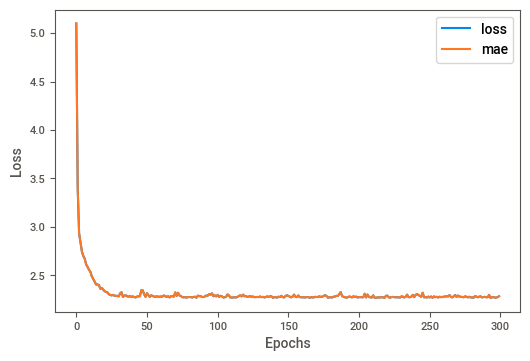

In [193]:
#plot history (Also known as loss  curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

#### Feature Importance
We will be using ExtraTreesRegressor class for Feature Importance. This class implements a meta estimator that fits a number of randomized decision trees on various samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [194]:
#model initialisation and data fitting 
etr_model = ExtraTreesRegressor()
etr_model.fit(X, y)
etr_model.feature_importances_

array([3.31992269e-02, 6.28206705e-02, 8.25881369e-02, 3.39334551e-01,
       5.29230522e-03, 7.74420654e-03, 0.00000000e+00, 3.02996044e-03,
       9.92505887e-04, 4.21421917e-02, 3.95454610e-03, 3.24188663e-03,
       4.22339192e-02, 3.57330974e-03, 4.62185331e-04, 2.17099674e-04,
       9.36452825e-03, 9.58727803e-03, 1.74801637e-02, 4.27816605e-02,
       4.04364651e-02, 0.00000000e+00, 3.75936916e-02, 3.96917697e-03,
       2.66373542e-02, 0.00000000e+00, 1.10683710e-02, 2.54886408e-02,
       0.00000000e+00, 3.70528902e-02, 3.14111631e-02, 3.41717792e-02,
       3.82871663e-02, 3.84296922e-03, 0.00000000e+00])

<AxesSubplot:>

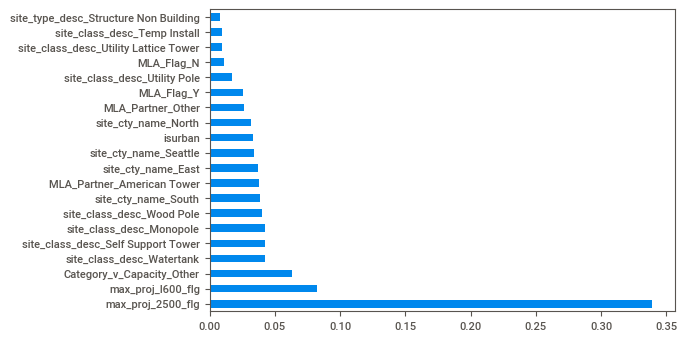

In [195]:
#Top 20 Important features
feature_imp = pd.Series(etr_model.feature_importances_, index = X.columns)
feature_imp.sort_values(ascending = False, inplace = True)
feature_imp.nlargest(20).sort_values(ascending = False).plot(kind = 'barh')

In [196]:
#defining function to print feature importances
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCES')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

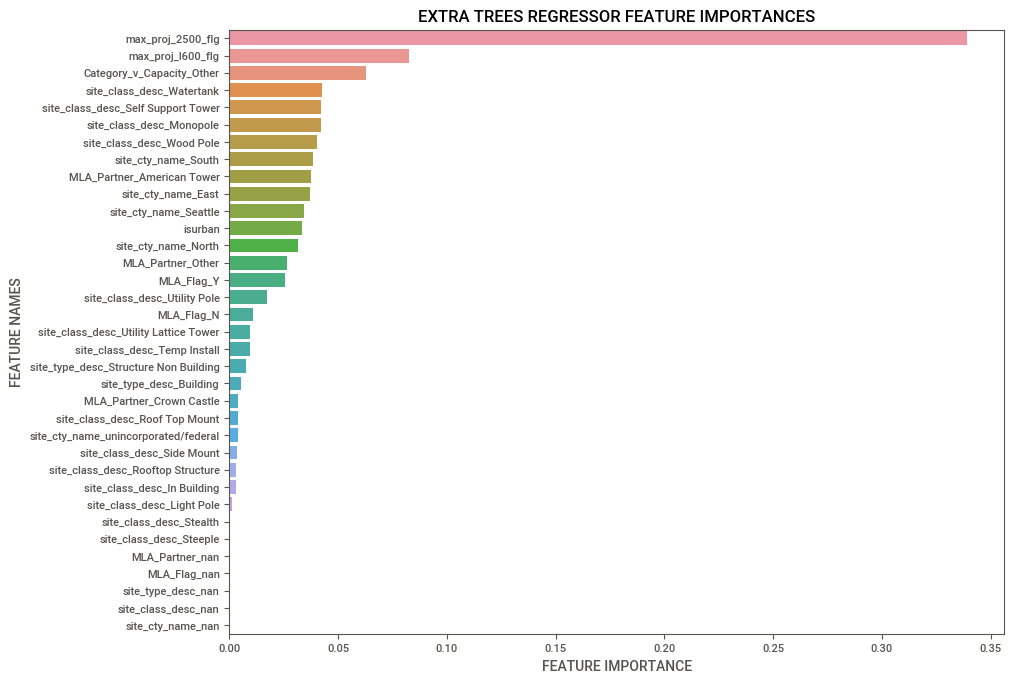

In [197]:
#plotting top features for random forest model
plot_feature_importance(etr_model.feature_importances_,X.columns,'EXTRA TREES REGRESSOR ')

#### Feature Scaling

In [198]:
#min-max scaling is a better option than Standard Scaler as the data is skewed and does ont follow a normal distribution
scaler_x = MinMaxScaler() #StandardScaler() #QuantileTransformer(output_distribution="uniform")

X_scaled = scaler_x.fit_transform(X)

#### Using Interaction terms in the linear model

In [199]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_scaled_poly = poly.fit_transform(X_scaled)

#### Model Design with target scaling

In [200]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer


def pass_func(x):
    return x
pass_transformer = FunctionTransformer(func=pass_func, inverse_func=pass_func)


pos_qt = QuantileTransformer(output_distribution="normal")
def qt_func(x):
    return max(qt.transform(x),0)
def qt_inv(x):
    return max(qt.inverse_transform(x), 0)
pos_qt_transformer = FunctionTransformer(func=pass_func, inverse_func=pass_func)

Cross-validation scores: [2.72971832 2.86771507 3.10184254 2.32008831 1.94859446 2.83231356
 3.48202773 2.7712339  2.52788237 1.90813521]
Average cross-validation score: 2.6489551476845135


<AxesSubplot:xlabel='EC Duration'>

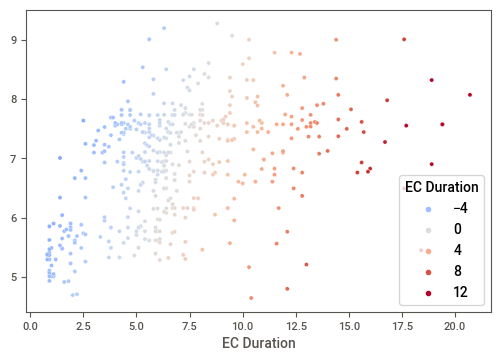

In [201]:
regr_trans = TransformedTargetRegressor(
    regressor=TweedieRegressor(link='log', power=2),
    #regressor=RidgeCV(),
    transformer=pass_transformer
    #transformer=MinMaxScaler()
    #transformer=PowerTransformer(method="box-cox")
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

In [202]:
#creating list of prediction differences values
lst = list(abs(y - y_pred))

In [203]:
#counting the number of prediction differences less than or equal to 1.5
count = 0
for i in lst:
    if i <= 1.5:
        count += 1
        
print(count)

174


In [204]:
print('Percentage of predictions with or less than 1.5 months Delta: {}'.format((count/y_pred.shape[0]) * 100))

Percentage of predictions with or less than 1.5 months Delta: 38.75278396436526


Cross-validation scores: [2.43102554 2.68031684 2.76822284 1.91899739 1.72226788 3.12006914
 3.38814908 2.67505362 2.67581542 1.8075513 ]
Average cross-validation score: 2.5187469048384896


<AxesSubplot:xlabel='EC Duration'>

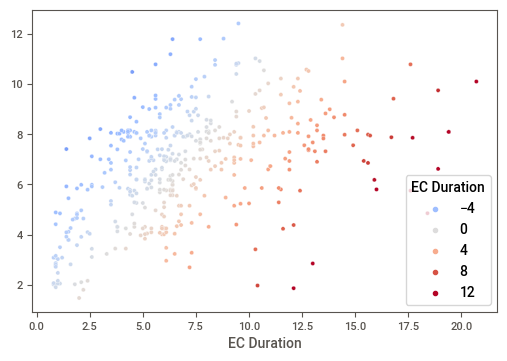

In [205]:
regr_trans = TransformedTargetRegressor(
    #regressor=TweedieRegressor(link='log', power=2),
    regressor=RidgeCV(),
    #transformer=pass_transformer
    #transformer=MinMaxScaler()
    transformer=PowerTransformer()
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [2.72747439 2.8631453  3.09747075 2.31544505 1.94726164 2.83369704
 3.48122797 2.77114101 2.52866235 1.90841744]
Average cross-validation score: 2.6473942945322784


<AxesSubplot:xlabel='EC Duration'>

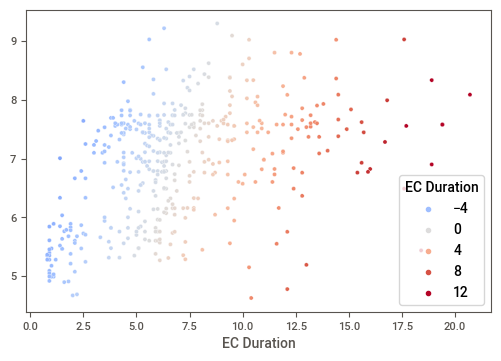

In [206]:
regr_trans = TransformedTargetRegressor(
    regressor=TweedieRegressor(link='log', power=1.99),
    #transformer=MinMaxScaler()
    #transformer=PowerTransformer()
    transformer=pos_qt_transformer
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [2.54400824 2.80277295 2.90749986 2.08352751 1.83953866 2.89631742
 3.2525499  2.67810758 2.66551422 1.65891001]
Average cross-validation score: 2.5328746354275364


<AxesSubplot:xlabel='EC Duration'>

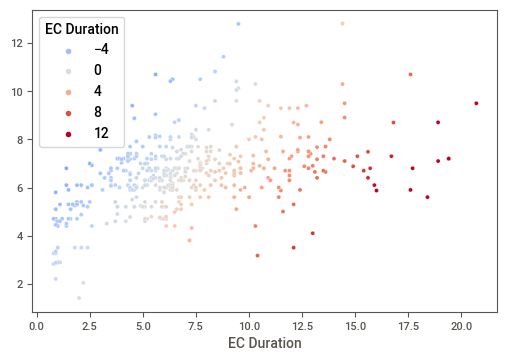

In [207]:
regr_trans = TransformedTargetRegressor(
    #regressor=TweedieRegressor(link='log', power=2),
    regressor=RidgeCV(),
    #transformer=pass_transformer
    #transformer=MinMaxScaler()
    #transformer=PowerTransformer(method="box-cox")
    transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [2.6478756  2.52899077 2.79302483 2.05361447 1.77931897 3.08764321
 3.43713422 2.84673071 2.39852755 1.91050488]
Average cross-validation score: 2.548336521116608


<AxesSubplot:xlabel='EC Duration'>

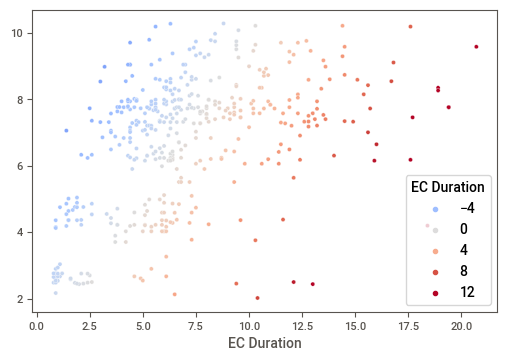

In [208]:
from sklearn.ensemble import RandomForestRegressor
regr_trans = TransformedTargetRegressor(
    #regressor=TweedieRegressor(link='log', power=2),
    regressor=RandomForestRegressor(min_samples_leaf=10),
    #transformer=pass_transformer
    #transformer=MinMaxScaler()
    transformer=PowerTransformer()
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

In [209]:
y_d = abs((y-y_pred))

In [210]:
y_diff = abs((y-y_pred)) <= 1.5

Text(0, 0.5, 'Predicted EC Duration')

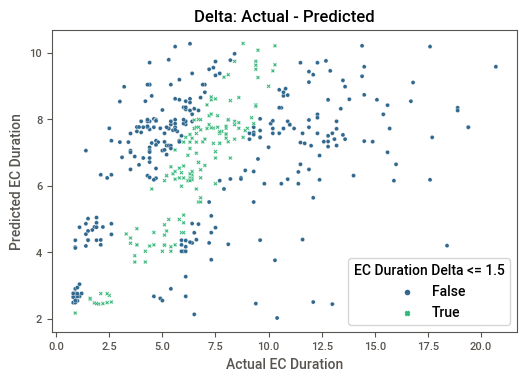

In [211]:
sns.scatterplot(y, y_pred, hue = y_diff, style = y_diff, palette="viridis", legend = 'full')
plt.legend(loc='lower right', title='EC Duration Delta <= 1.5')
plt.title('Delta: Actual - Predicted')
plt.xlabel('Actual EC Duration')
plt.ylabel('Predicted EC Duration')

In [212]:
#creating list of prediction differences values
lst = list(abs(y - y_pred))

In [213]:
#counting the number of prediction differences less than or equal to 1.5
count = 0
for i in lst:
    if i <= 1.5:
        count += 1
        
print(count)

155


In [214]:
print('Percentage of predictions around 1.5 months Delta: {}'.format((count/378) * 100))

Percentage of predictions around 1.5 months Delta: 41.00529100529101
